In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

In [1]:
people_list_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/people_list.csv'
relevant_names_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/relevant_names.csv'

In [ ]:
people_list = pd.read_csv(people_list_path)
people_list.nconst = people_list.nconst.apply(literal_eval)
print(people_list.shape)
people_list.head()

(3540, 2)


,tconst,nconst
0,tt0035423,"[nm0000212, nm0413168, nm0000630, nm0005227]"
1,tt0118589,"[nm0001014, nm0073160, nm0066586, nm0004771]"
2,tt0120467,"[nm0641168, nm0424682, nm0507915, nm0839486]"
3,tt0120667,"[nm0344435, nm0004821, nm0262635, nm0004695]"
4,tt0120679,"[nm0000161, nm0000547, nm0001691, nm0535502]"


In [ ]:
# relevant_names = pd.read_csv(relevant_names_path)
# print(relevant_names.shape)
# relevant_names.head()

In [ ]:
# name_exp = relevant_names.assign(profession=relevant_names['primaryProfession'].str.split(',')).explode('profession')
# print(name_exp.shape)
# name_exp.head()

In [ ]:
principals_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/principals.csv'
principals = pd.read_csv(principals_path)
principals.head(2)

,tconst,ordering,nconst,category,job,characters
0,tt0035423,1,nm0000212,actress,\N,"[""Kate McKay""]"
1,tt0035423,2,nm0413168,actor,\N,"[""Leopold""]"


In [ ]:
tmp = principals[['nconst', 'category']].drop_duplicates()
profession_dict = dict(zip(tmp.nconst, tmp.category))

In [ ]:
def get_genders(nconst_list):
  genders = []
  for nconst in nconst_list:
    genders.append(profession_dict[nconst])
  return genders

# Test -- Cloud Atlas: Tom Hanks, Halle Berry, Hugh Grant (?), Hugo Weaving (?)
tmp_list = people_list[people_list.tconst == 'tt1371111'].nconst.to_list()[0]
get_genders(tmp_list)

['actor', 'actress', 'actor', 'actor']

In [ ]:
people_list['professions'] = people_list.apply(lambda x: get_genders(x.nconst), axis=1)

In [ ]:
people_list.head()

,tconst,nconst,professions
0,tt0035423,"[nm0000212, nm0413168, nm0000630, nm0005227]","[actress, actor, actor, actor]"
1,tt0118589,"[nm0001014, nm0073160, nm0066586, nm0004771]","[actress, actor, actor, actress]"
2,tt0120467,"[nm0641168, nm0424682, nm0507915, nm0839486]","[actor, actor, actor, actor]"
3,tt0120667,"[nm0344435, nm0004821, nm0262635, nm0004695]","[actor, actor, actor, actress]"
4,tt0120679,"[nm0000161, nm0000547, nm0001691, nm0535502]","[actress, actor, actor, actress]"


In [ ]:
people_list['num_cast'] = [len(l) for l in people_list.professions.to_list()]
people_list.head()

,tconst,nconst,professions,num_cast
0,tt0035423,"[nm0000212, nm0413168, nm0000630, nm0005227]","[actress, actor, actor, actor]",4
1,tt0118589,"[nm0001014, nm0073160, nm0066586, nm0004771]","[actress, actor, actor, actress]",4
2,tt0120467,"[nm0641168, nm0424682, nm0507915, nm0839486]","[actor, actor, actor, actor]",4
3,tt0120667,"[nm0344435, nm0004821, nm0262635, nm0004695]","[actor, actor, actor, actress]",4
4,tt0120679,"[nm0000161, nm0000547, nm0001691, nm0535502]","[actress, actor, actor, actress]",4


In [ ]:
people_list_4 = people_list[people_list.num_cast == 4]
print(people_list_4.shape)
people_list_4.head()

(3491, 4)


,tconst,nconst,professions,num_cast
0,tt0035423,"[nm0000212, nm0413168, nm0000630, nm0005227]","[actress, actor, actor, actor]",4
1,tt0118589,"[nm0001014, nm0073160, nm0066586, nm0004771]","[actress, actor, actor, actress]",4
2,tt0120467,"[nm0641168, nm0424682, nm0507915, nm0839486]","[actor, actor, actor, actor]",4
3,tt0120667,"[nm0344435, nm0004821, nm0262635, nm0004695]","[actor, actor, actor, actress]",4
4,tt0120679,"[nm0000161, nm0000547, nm0001691, nm0535502]","[actress, actor, actor, actress]",4


In [ ]:
all_professions = people_list_4.professions.to_list()
leading_roles_dict = dict()
for i in range(4):
  all_roles = [l[i] for l in all_professions]
  values, counts = np.unique(all_roles, return_counts=True)
  leading_roles_dict[i] = dict(zip(values, counts))

In [ ]:
leading_roles_dict

{0: {'actor': 2439, 'actress': 1052},
 1: {'actor': 2062, 'actress': 1429},
 2: {'actor': 2106, 'actress': 1385},
 3: {'actor': 2196, 'actress': 1295}}

In [ ]:
[e['actor'] for e in leading_roles_dict.values()]

[2439, 2062, 2106, 2196]

In [ ]:
sns.choose_colorbrewer_palette('divering')

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

[(0.6922722029988467, 0.09227220299884642, 0.16770472895040373),
 (0.8392156862745099, 0.376470588235294, 0.3019607843137253),
 (0.9545559400230679, 0.641753171856978, 0.5057285659361783),
 (0.9921568627450982, 0.8588235294117645, 0.7803921568627449),
 (0.9657054978854286, 0.9672433679354094, 0.9680891964628989),
 (0.8196078431372551, 0.8980392156862745, 0.9411764705882353),
 (0.5664744329104192, 0.7687043444828916, 0.8685121107266438),
 (0.26274509803921564, 0.576470588235294, 0.7647058823529411),
 (0.1272587466359093, 0.39584775086505203, 0.6687427912341407)]

In [ ]:
diverging_colors = sns.color_palette("Spectral", 15, 1)
diverging_colors

[(0.7549404075355632, 0.15401768550557482, 0.29081122645136503),
 (0.8662821991541714, 0.29011918492887356, 0.2978085351787776),
 (0.9425605536332179, 0.40576701268742793, 0.26828143021914663),
 (0.9748558246828143, 0.5574009996155325, 0.3227220299884659),
 (0.9926951172625913, 0.709265667051134, 0.4029988465974623),
 (0.9951557093425605, 0.8322952710495963, 0.5063437139561706),
 (0.9976163014225298, 0.9261053440984237, 0.6250672818146866),
 (0.9980776624375239, 0.9992310649750095, 0.746020761245675),
 (0.9365628604382931, 0.9746251441753172, 0.6500576701268744),
 (0.8384467512495197, 0.9349480968858133, 0.6089965397923875),
 (0.6932718185313345, 0.8758938869665515, 0.6385236447520185),
 (0.5273356401384084, 0.8106113033448674, 0.6452133794694349),
 (0.3680123029603999, 0.7251057285659361, 0.6618223760092273),
 (0.24006151480199933, 0.5823913879277197, 0.720876585928489),
 (0.2671280276816609, 0.4412918108419839, 0.6975778546712803)]

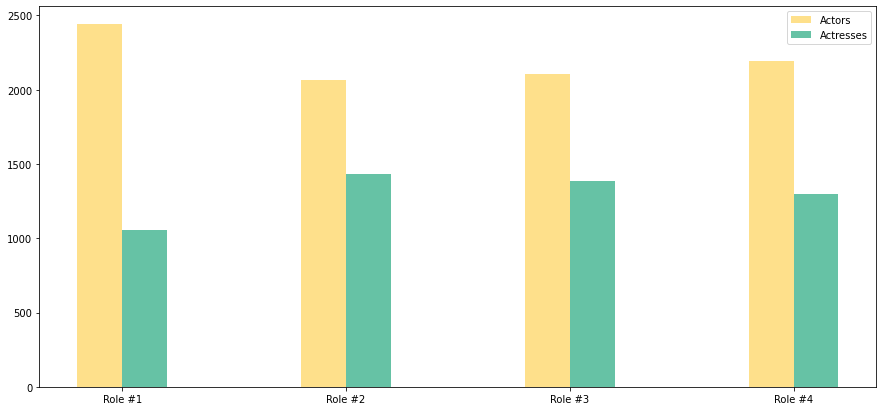

In [ ]:
plt.figure(figsize=(15, 7))

plt.bar(range(4), [e['actor'] for e in leading_roles_dict.values()], color=diverging_colors[3], width=-0.2, align='edge', label='Actors')
plt.bar(range(4), [e['actress'] for e in leading_roles_dict.values()], color=diverging_colors[7], width=0.2, align='edge', label='Actresses')

plt.xticks(range(4), labels=[f'Role #{i+1}' for i in range(4)])
# plt.ticklabel_format(style='plain', useOffset=False, axis='y')

plt.legend()
plt.show()

In [ ]:
movies_cast_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/movies_cast_2.csv'
movies_cast = pd.read_csv(movies_cast_path)
print(movies_cast.shape)
movies_cast.head(2)

(3540, 20)


,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,tmdb_id,og_language,budget,revenue,ratio,ROI,averageRating,numVotes,Unnamed: 18,nconst
0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,"Horror,Mystery",23827,en,230000,194183034,0.001184,844.274061,6.3,238846,Info says budget is $15k,"['nm2209370', 'nm2913790', 'nm2104166', 'nm291..."
1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,"Horror,Mystery,Thriller",299245,en,100000,42664410,0.002344,426.644100,4.2,20611,NaN,"['nm3790547', 'nm6018502', 'nm4090362', 'nm225..."


In [ ]:
year_dict = dict(zip(movies_cast.tconst, movies_cast.startYear))

In [ ]:
people_list['year'] = people_list.apply(lambda x: year_dict[x.tconst], axis=1)
people_list.head(2)

,tconst,nconst,professions,num_cast,year
0,tt0035423,"[nm0000212, nm0413168, nm0000630, nm0005227]","[actress, actor, actor, actor]",4,2001
1,tt0118589,"[nm0001014, nm0073160, nm0066586, nm0004771]","[actress, actor, actor, actress]",4,2001


In [ ]:
people_list_4['year'] = people_list_4.apply(lambda x: year_dict[x.tconst], axis=1)
people_list_4 = people_list_4.drop(columns=['num_cast'])
people_list_4.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tconst,nconst,professions,year
0,tt0035423,"[nm0000212, nm0413168, nm0000630, nm0005227]","[actress, actor, actor, actor]",2001
1,tt0118589,"[nm0001014, nm0073160, nm0066586, nm0004771]","[actress, actor, actor, actress]",2001


In [ ]:
people_list_4['ordering'] = [list(range(4)) for x in range(len(people_list_4.index))]
people_list_4.head()

,tconst,nconst,professions,year,ordering
0,tt0035423,"[nm0000212, nm0413168, nm0000630, nm0005227]","[actress, actor, actor, actor]",2001,"[0, 1, 2, 3]"
1,tt0118589,"[nm0001014, nm0073160, nm0066586, nm0004771]","[actress, actor, actor, actress]",2001,"[0, 1, 2, 3]"
2,tt0120467,"[nm0641168, nm0424682, nm0507915, nm0839486]","[actor, actor, actor, actor]",2000,"[0, 1, 2, 3]"
3,tt0120667,"[nm0344435, nm0004821, nm0262635, nm0004695]","[actor, actor, actor, actress]",2005,"[0, 1, 2, 3]"
4,tt0120679,"[nm0000161, nm0000547, nm0001691, nm0535502]","[actress, actor, actor, actress]",2002,"[0, 1, 2, 3]"


In [ ]:
people_list_exp = people_list_4.set_index(['tconst', 'year']).apply(pd.Series.explode).reset_index()
print(people_list_exp.shape)
people_list_exp.head()

(13964, 5)


,tconst,year,nconst,professions,ordering
0,tt0035423,2001,nm0000212,actress,0
1,tt0035423,2001,nm0413168,actor,1
2,tt0035423,2001,nm0000630,actor,2
3,tt0035423,2001,nm0005227,actor,3
4,tt0118589,2001,nm0001014,actress,0


In [ ]:
ordering_year_count = people_list_exp.groupby(by=['year', 'ordering', 'professions']).count()
ordering_year_count.head()

tconst  nconst
year ordering professions                
2000 0        actor           105     105
              actress          32      32
     1        actor            88      88
              actress          49      49
     2        actor            86      86

In [ ]:
order_year_dict = pd.pivot_table(ordering_year_count.reset_index(),
                                 values='tconst',
                                 index='year',
                                 columns=['ordering', 'professions']).to_dict(orient='index')

In [ ]:
order_year_dict[2019]

{(0, 'actor'): 77,
 (0, 'actress'): 44,
 (1, 'actor'): 77,
 (1, 'actress'): 44,
 (2, 'actor'): 68,
 (2, 'actress'): 53,
 (3, 'actor'): 71,
 (3, 'actress'): 50}

In [ ]:
all_nums = [order_year_dict[2019][(i, 'actor')] for i in range(4)]
all_nums

[77, 77, 68, 71]

In [ ]:
[i / sum(all_nums) for i in all_nums]

[0.2627986348122867,
 0.2627986348122867,
 0.23208191126279865,
 0.24232081911262798]

In [ ]:
order_prop_dict = dict()
for year in order_year_dict.keys():
  order_prop_dict[year] = dict()
  for prof in ['actor', 'actress']:
    all_nums = [order_year_dict[year][(i, prof)] for i in range(4)]
    all_props = [i / sum(all_nums) for i in all_nums]
    order_prop_dict[year][prof] = all_props

In [ ]:
order_prop_dict[2018]['actor'], order_prop_dict[2019]['actor']

([0.26628895184135976,
  0.2096317280453258,
  0.24645892351274787,
  0.2776203966005666],
 [0.2627986348122867,
  0.2627986348122867,
  0.23208191126279865,
  0.24232081911262798])

In [ ]:
order_dict = dict()
order_dict['actor'] = dict()
for i in range(4):
  order_dict['actor'][i] = [v['actor'][i] for v in order_prop_dict.values()]
order_dict['actress'] = dict()
for i in range(4):
  order_dict['actress'][i] = [v['actress'][i] for v in order_prop_dict.values()]

In [ ]:
order_dict['actor'][0][:3], order_dict['actor'][1][:3], order_dict['actor'][2][:3], order_dict['actor'][3][:3]

([0.2845528455284553, 0.28, 0.2773722627737226],
 [0.23848238482384823, 0.235, 0.25790754257907544],
 [0.23306233062330622, 0.24, 0.2384428223844282],
 [0.24390243902439024, 0.245, 0.22627737226277372])

In [ ]:
.28 + .235 + .24 + .245

1.0

In [ ]:
sns.choose_colorbrewer_palette('sequential')

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

[(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]

In [ ]:
seq_colors_bu = sns.color_palette("PuBu_r", 4, 1)
seq_colors_bu

[(0.018039215686274535, 0.404705882352941, 0.6352941176470588),
 (0.260392156862745, 0.5843137254901958, 0.7647058823529411),
 (0.611764705882353, 0.7254901960784313, 0.8494117647058823),
 (0.859607843137255, 0.8541176470588236, 0.9207843137254901)]

In [ ]:
seq_colors_yl = sns.color_palette("Reds_r", 4, 1)
seq_colors_yl

[(0.7364705882352941, 0.07999999999999996, 0.1011764705882348),
 (0.9466666666666668, 0.268235294117647, 0.196078431372549),
 (0.9874509803921568, 0.5411764705882353, 0.4156862745098039),
 (0.991372549019608, 0.7913725490196077, 0.708235294117647)]

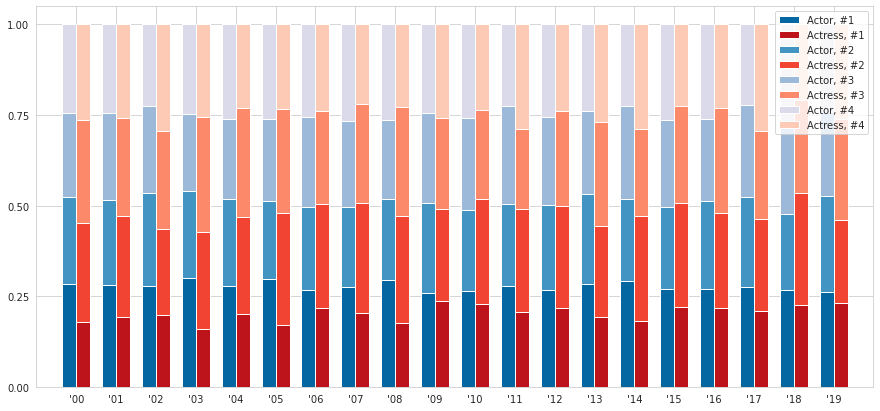

In [ ]:
sns.set_style('whitegrid')

labels = [f"'{str(y)[2:]}" for y in order_prop_dict.keys()]
width = 0.35

f, ax = plt.subplots(figsize=(15, 7))

for i in range(4):
  if i == 0:
    ax.bar(labels, order_dict['actor'][i], width=-width, align='edge', label=f'Actor, #{i+1}', color=seq_colors_bu[i])
    ax.bar(labels, order_dict['actress'][i], width=width, align='edge', label=f'Actress, #{i+1}', color=seq_colors_yl[i])
  else:
    ax.bar(labels, order_dict['actor'][i], width=-width, align='edge', label=f'Actor, #{i+1}', color=seq_colors_bu[i], bottom=[sum(x) for x in zip(*[order_dict['actor'][i] for i in range(i)])])
    ax.bar(labels, order_dict['actress'][i], width=width, align='edge', label=f'Actress, #{i+1}', color=seq_colors_yl[i], bottom=[sum(x) for x in zip(*[order_dict['actress'][i] for i in range(i)])])

ax.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
ax.set_xlim([0-1, 19+1])

plt.legend()
plt.show()